1) Title & Objective (Goal + 1-sentence story)

Project Title:
Rossmann Store Sales – Exploratory Data Analysis (EDA) & Insights

Objective / Story (1–2 sentences):
The goal of this project is to analyze Rossmann’s daily store sales over time and across operational factors such as promotions (Promo), holidays (SchoolHoliday/StateHoliday), store type (StoreType), and assortment level (Assortment). The analysis aims to identify which factors are most strongly associated with Sales and which store segments/conditions achieve higher performance.

2) Dataset Overview

Dataset: Rossmann Store Sales (Kaggle)

Files used:

train.csv: historical daily data by store, including the target variable Sales and features such as Customers, Promo, Open, DayOfWeek, StateHoliday, and SchoolHoliday.

store.csv: static store information, including StoreType, Assortment, CompetitionDistance, and variables related to the Promo2 program.

test.csv (reference): a dataset without Sales, typically used for forecasting/submission (not required for basic EDA).

Key columns:

Store: store ID (the key used to merge train and store).

Date: transaction date.

Sales: daily revenue (main target variable for analysis).

Customers: number of customers per day.

Open: whether the store is open (0/1).

Promo: whether a promotion is running (0/1).

DayOfWeek: day of the week (1–7).

StateHoliday: public/state holiday indicator (may affect operations/demand).

SchoolHoliday: school holiday indicator (0/1).

StoreType: store type (from store.csv).

Assortment: assortment level (from store.csv).

CompetitionDistance: distance to the nearest competitor (from store.csv).

Note (to include in the notebook):
In EDA, days when the store is closed (Open = 0) typically have Sales = 0. Therefore, the sales behavior analysis will mainly focus on days when Open = 1 to better reflect actual business performance.

In [3]:
import os
os.chdir(r"C:\Users\kimdi\Downloads\Final project\data")
print("CWD =", os.getcwd())
print("Files =", os.listdir())


CWD = C:\Users\kimdi\Downloads\Final project\data
Files = ['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']


In [4]:
import pandas as pd

train = pd.read_csv("train.csv", low_memory=False)
test  = pd.read_csv("test.csv", low_memory=False)
store = pd.read_csv("store.csv")

df = train.merge(store, on="Store", how="left")
df.shape, df.head()


((1017209, 18),
    Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0

In [5]:
df.info()
df.isna().sum().sort_values(ascending=False).head(15)
df.duplicated().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
df["Day"] = df["Date"].dt.day


In [7]:
df["StateHoliday"] = df["StateHoliday"].astype(str)
df["StateHoliday"] = df["StateHoliday"].replace({"0":"None"})


In [8]:
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())


In [9]:
df_open = df[df["Open"] == 1].copy()


Q1) How does total system-wide revenue (sales) change over time?


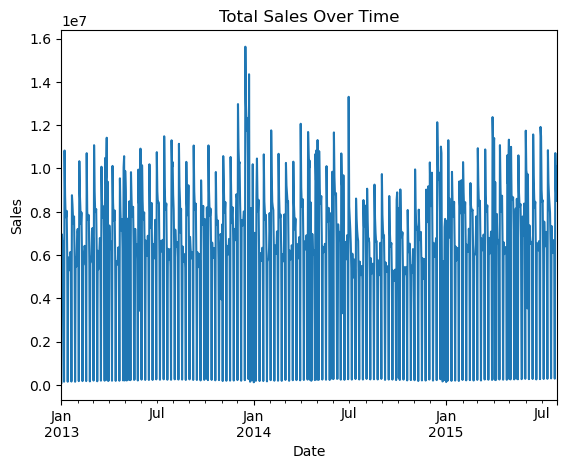

In [11]:
import matplotlib.pyplot as plt

daily_sales = df_open.groupby("Date")["Sales"].sum()
plt.figure()
daily_sales.plot()
plt.title("Total Sales Over Time")
plt.ylabel("Sales")
plt.show()


Total daily sales fluctuate noticeably over time, showing clear up-and-down periods and potential seasonality. Sharp declines in some segments may be related to holidays/closures or changes in promotional activity, indicating that time-related factors have a meaningful impact on Sales.

Q2) How does revenue differ by day of the week?

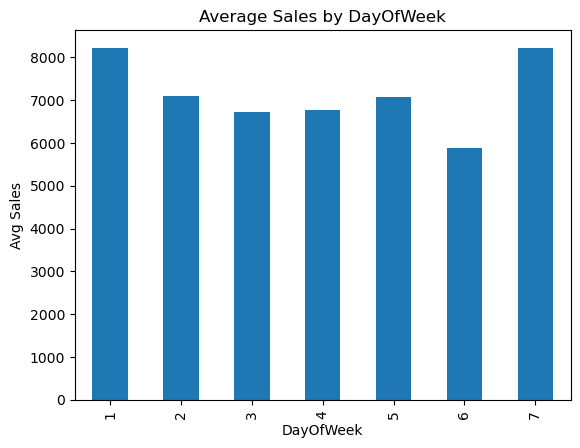

In [12]:
dow = df_open.groupby("DayOfWeek")["Sales"].mean().sort_index()
plt.figure()
dow.plot(kind="bar")
plt.title("Average Sales by DayOfWeek")
plt.ylabel("Avg Sales")
plt.show()


Average sales differ clearly across days of the week, suggesting weekly shopping patterns. The gap between the highest- and lowest-performing days is substantial, implying staffing and promotions should be optimized around peak-demand days.

Q3) Does running a promotion (Promo) increase sales?

<Figure size 640x480 with 0 Axes>

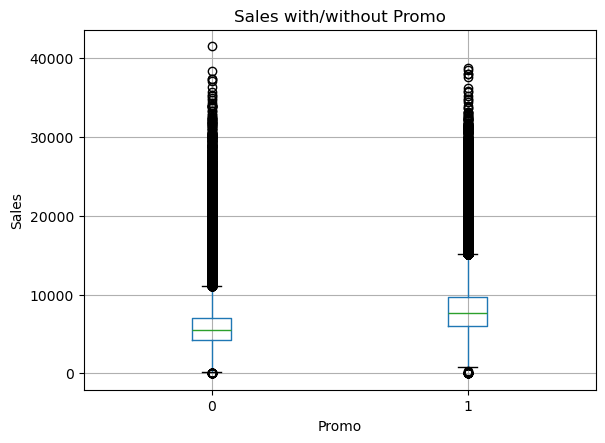

In [14]:
plt.figure()
df_open.boxplot(column="Sales", by="Promo")
plt.title("Sales with/without Promo")
plt.suptitle("")
plt.ylabel("Sales")
plt.show()


Days with Promo typically show higher Sales (median/mean) than days without Promo, suggesting promotions are positively associated with revenue. However, the wider spread under Promo=1 implies promotional effectiveness varies across stores, so it’s worth analyzing results by StoreType/Assortment.

Q4) How does SchoolHoliday affect sales?

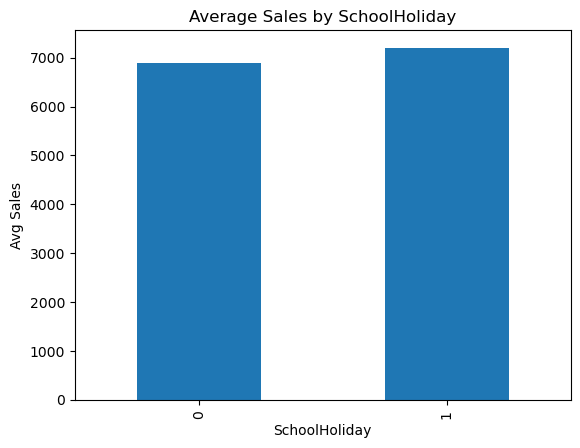

In [15]:
sh = df_open.groupby("SchoolHoliday")["Sales"].mean()
plt.figure()
sh.plot(kind="bar")
plt.title("Average Sales by SchoolHoliday")
plt.ylabel("Avg Sales")
plt.show()


Average sales differ between SchoolHoliday = 1 and SchoolHoliday = 0, indicating school breaks may influence customer traffic and purchasing behavior. This effect likely varies by store type or location, so checking the interaction between SchoolHoliday and StoreType is recommended.

Q5) How do StateHolidays (public holidays) affect sales?

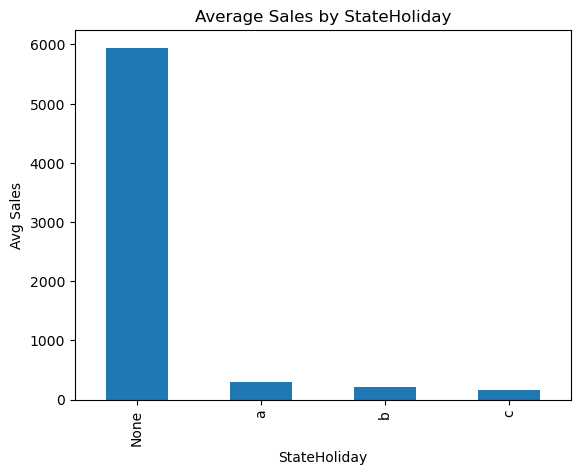

In [16]:
hh = df.groupby("StateHoliday")["Sales"].mean().sort_values(ascending=False)
plt.figure()
hh.plot(kind="bar")
plt.title("Average Sales by StateHoliday")
plt.ylabel("Avg Sales")
plt.show()


Average sales vary by StateHoliday category, suggesting public holidays influence store operations and demand (e.g., reduced opening hours or holiday-driven shopping). For a cleaner comparison, it is better to focus on Open = 1 days to avoid bias from closed-store days.

Q6) Which StoreType sells the most (performs best)?

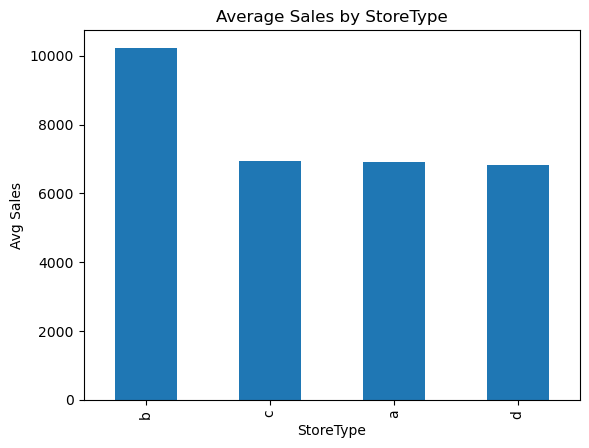

In [17]:
st = df_open.groupby("StoreType")["Sales"].mean().sort_values(ascending=False)
plt.figure()
st.plot(kind="bar")
plt.title("Average Sales by StoreType")
plt.ylabel("Avg Sales")
plt.show()


Sales performance differs substantially across StoreType, indicating that the store format/positioning strongly relates to revenue. The best-performing store types are good candidates for scaling strategies (inventory, promotions), while lower-performing types may need different promotional or assortment approaches.

Q7) Does the assortment level (product range) affect sales?

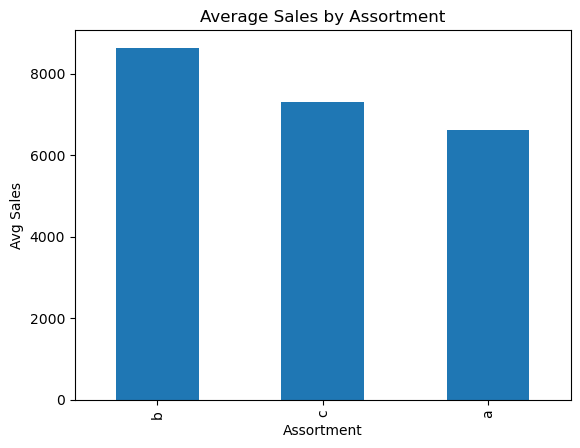

In [18]:
ass = df_open.groupby("Assortment")["Sales"].mean().sort_values(ascending=False)
plt.figure()
ass.plot(kind="bar")
plt.title("Average Sales by Assortment")
plt.ylabel("Avg Sales")
plt.show()


Average sales vary by Assortment level, suggesting product range breadth is associated with sales performance. To interpret this properly, it helps to also examine Customers to separate “more traffic” effects from “higher basket size” effects.

Q8) What is the relationship between Sales and Customers?

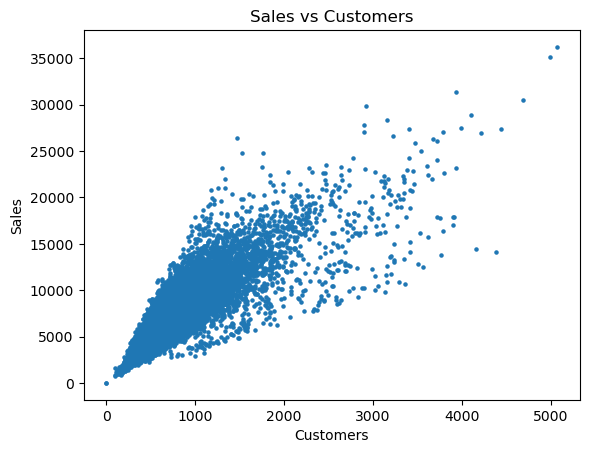

In [19]:
sample_scatter = df_open.sample(20000, random_state=42)
plt.figure()
plt.scatter(sample_scatter["Customers"], sample_scatter["Sales"], s=5)
plt.title("Sales vs Customers")
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()


The scatter plot shows a clear positive relationship: as Customers increase, Sales generally increase, implying revenue is largely traffic-driven. Outliers (high Sales with moderate Customers, or vice versa) may reflect strong promo days or differences in average spend per customer.

Q9) Does CompetitionDistance affect sales?

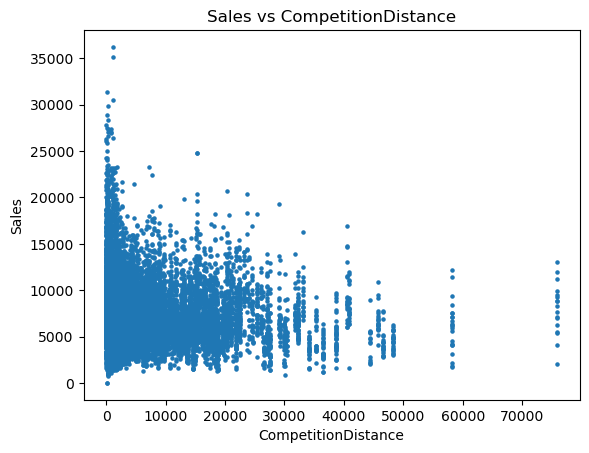

In [20]:
sample_comp = df_open.sample(20000, random_state=42)
plt.figure()
plt.scatter(sample_comp["CompetitionDistance"], sample_comp["Sales"], s=5)
plt.title("Sales vs CompetitionDistance")
plt.xlabel("CompetitionDistance")
plt.ylabel("Sales")
plt.show()


The relationship between CompetitionDistance and Sales is not strongly linear at the overall level, suggesting competitor proximity is not the sole driver of revenue. Binning CompetitionDistance into ranges or segmenting by StoreType/Assortment may reveal clearer patterns.

Q10) Which are the top 10 stores with the highest sales?

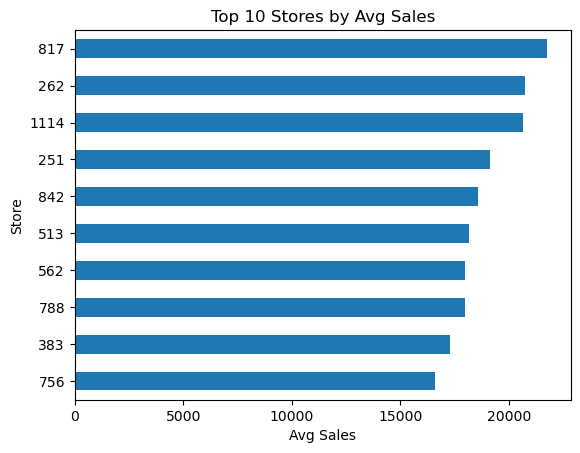

In [21]:
top10 = df_open.groupby("Store")["Sales"].mean().sort_values(ascending=False).head(10)
plt.figure()
top10.sort_values().plot(kind="barh")
plt.title("Top 10 Stores by Avg Sales")
plt.xlabel("Avg Sales")
plt.show()


The top 10 stores by average sales significantly outperform the rest, indicating strong performance dispersion across stores. These top stores likely share common characteristics (StoreType/Assortment/Promo2), so profiling them can help identify scalable best practices.

2026-02-08 00:55:06.188 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-08 00:55:06.193 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2026-02-08 00:55:06.197 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2026-02-08 00:55:06.198 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-08 00:55:06.537 
  command:

    streamlit run C:\Users\kimdi\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-08 00:55:06.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-08 00:55:06.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ig

DeltaGenerator()

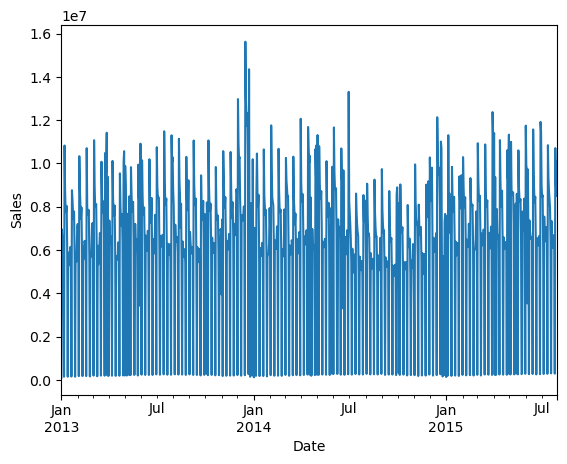

In [22]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(page_title="Rossmann Dashboard", layout="wide")

@st.cache_data
def load_data():
    train = pd.read_csv("../data/train.csv", low_memory=False)
    store = pd.read_csv("../data/store.csv")
    df = train.merge(store, on="Store", how="left")

    df["Date"] = pd.to_datetime(df["Date"])
    df["StateHoliday"] = df["StateHoliday"].astype(str).replace({"0": "None"})
    df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())

    df_open = df[df["Open"] == 1].copy()
    return df_open

df = load_data()

st.title("Rossmann Store Sales Dashboard")

# Simple filters
st.sidebar.header("Filters")
min_date = df["Date"].min().date()
max_date = df["Date"].max().date()
date_range = st.sidebar.date_input("Date range", (min_date, max_date))

start = pd.to_datetime(date_range[0])
end = pd.to_datetime(date_range[1])
f = df[(df["Date"] >= start) & (df["Date"] <= end)]

# KPIs
c1, c2, c3 = st.columns(3)
c1.metric("Total Sales", f["Sales"].sum())
c2.metric("Average Sales", round(f["Sales"].mean(), 2))
c3.metric("Total Customers", f["Customers"].sum())

st.divider()

# Plot: Total sales over time
st.subheader("Total Sales Over Time")
daily = f.groupby("Date")["Sales"].sum()
fig = plt.figure()
daily.plot()
plt.ylabel("Sales")
st.pyplot(fig)

st.divider()
st.subheader("Data preview")
st.dataframe(f.head(30))
